<a href="https://colab.research.google.com/github/stableminded/Synapse_lp/blob/Week_4/Dhairya_SynapseLP_Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
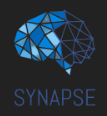

In the task for this week, we will be exploring another ML Models like Decision Tree, Random Forest and Naive Bayes. We will also learn hyperparameter tuning using ensemble techniques (Bagging & Boosting) and Decision Tree Pruning.

**This Task has various theory questions to be answered here and there. Don't miss out on those, as they will make you'll conceptually stronger, and give a better understanding.**

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

# Decision Tree Classifier

* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

Load the titanic dataset in a pandas dataframe (download dataset from https://www.kaggle.com/c/titanic/data and store it in the "Synapse" folder initially created for the interview tasks) Note that you have to download the train and test csv files seperately

<b>Read the titanic_data.csv using pandas and show the dataframe</b>

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
#write code here
import pandas as pd

df_train = pd.read_csv('/content/drive/My Drive/Synapse/train.csv')
df_test=pd.read_csv('/content/drive/My Drive/Synapse/test.csv')

In [82]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Visualizing hidden Details

* print the name column of the data
* notice that the word after the first comma encapsulates the title of the person (Mr., Mrs, etc)
* extract the title using regular expression (help given below in the code)
* store the title in a new column in the dataframe. Name the column : Title

In [83]:
# try researching about regex
import re
print(df_train['Name'])
def extract_title(text):
    match = re.search(r',\s*(\w+\.)', text)
    if match:
        return match.group(1)
    else:
        return None
df_train['Title'] = df_train['Name'].apply(extract_title)
df_test['Title']=df_test['Name'].apply(extract_title)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


In [84]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.


### Removing unnecessary columns
*   The columns PassengerId and Ticket play no logical role in being related to the survival of a passenger. Hence we will remove them.
*   We will also remove the Name column as we have done feature extraction and obtained titles instead. (test set might have extra titles which are not in the train set. Think about how we would consider them. This however doesn't affect task 1's objective)

In [85]:
#write code here
df_train.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

### Nan analysis
*   write code to find the percentage of Nans in each column and visualize it in a tabular format
*   remove any column having more than 50% Nans as they would be of no use

In [86]:
#write code here
nan_perct_train = (df_train.isnull().sum() / len(df_train)) * 100
nan_perct_test = (df_test.isnull().sum() / len(df_test))*100
nan_df_train = pd.DataFrame({'Column': df_train.columns, 'NaN Percentage': nan_perct_train})
nan_df_test=pd.DataFrame({'Column': df_train.columns, 'NaN Percentage': nan_perct_train})

nan_df_train

,Column,NaN Percentage
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377
Embarked,Embarked,0.224467
Title,Title,0.112233


In [87]:
nan_df_test

,Column,NaN Percentage
Survived,Survived,0.000000
Pclass,Pclass,0.000000
Sex,Sex,0.000000
Age,Age,19.865320
SibSp,SibSp,0.000000
Parch,Parch,0.000000
Fare,Fare,0.000000
Cabin,Cabin,77.104377
Embarked,Embarked,0.224467
Title,Title,0.112233


In [88]:
df_train.drop(['Cabin'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)

*   Fill Nans in the Embark column with the statistical mode
*   Fill Nans in the Age column with it's statistical mean

In [89]:
mode_train = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(mode_train, inplace=True)

mode_test = df_test['Embarked'].mode()[0]
df_test['Embarked'].fillna(mode_test, inplace=True)

mean_train = df_train['Age'].mean()
df_train['Age'].fillna(mean_train, inplace=True)

mean_test = df_test['Age'].mean()
df_test['Age'].fillna(mean_test, inplace=True)

### Adding features to the dataset
*   Read the kaggle link (titanic dataset) provided above and see what the two columns SibSP and Parch signify
*   Using that create a new column called **Family_members**
*   Fill it with the sum of SibSP and Parch

In [90]:
#write code here
df_test['Family_members'] = df_test['SibSp'] + df_test['Parch']
df_train['Family_members'] =df_train['SibSp'] + df_train['Parch']

In [91]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_members
0,3,male,34.50000,0,0,7.8292,Q,Mr.,0
1,3,female,47.00000,1,0,7.0000,S,Mrs.,1
2,2,male,62.00000,0,0,9.6875,Q,Mr.,0
3,3,male,27.00000,0,0,8.6625,S,Mr.,0
4,3,female,22.00000,1,1,12.2875,S,Mrs.,2
...,...,...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S,Mr.,0
414,1,female,39.00000,0,0,108.9000,C,Dona.,0
415,3,male,38.50000,0,0,7.2500,S,Mr.,0
416,3,male,30.27259,0,0,8.0500,S,Mr.,0


In [92]:
#Normalize the columns ("Age", "Fare", "Family_members")
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

col= ["Age", "Fare", "Family_members"]

df_train[col] = scaler.fit_transform(df_train[col])
df_test[col] = scaler.fit_transform(df_test[col])

In [93]:
#apply one hot encoding on the columns ('Pclass','Sex','Title','Embarked')
df_train= pd.get_dummies(df_train, columns=['Pclass', 'Sex', 'Title', 'Embarked'])
df_test= pd.get_dummies(df_test, columns=['Pclass', 'Sex', 'Title', 'Embarked'])

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [94]:
df_train

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [95]:
#write code here
y_label=df_train['Survived']

<b>remove the y_label (survived) from the dataframe</b>

In [96]:
#write code here
df_train.drop('Survived',axis=1,inplace=True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [97]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,y_label,test_size=0.3,random_state=108)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [125]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=9)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=9)

<b>Print the Model Accuracy</b>

In [126]:
dt.score(X_train,y_train)

0.9871589085072231

In [127]:
#write code here
predictions=dt.predict(X_test)
from sklearn.metrics import accuracy_score
acc_1=accuracy_score(y_test, predictions)
print((round(acc_1,5)*100))

79.104


## Explain: Give a Real life Example where Decision Tree Classifier can be used.

Ans:

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [128]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
import matplotlib.pyplot as plt
train_accuracy=[]
test_accuracy=[]
dt_2= DecisionTreeClassifier(random_state=108)

for depth in range(1, 11):
    dt_2.set_params(max_depth=depth)
    dt_2.fit(X_train, y_train)
    train_predictions = dt_2.predict(X_train)
    train_accuracy.append(accuracy_score(y_train, train_predictions))
    test_predictions = dt_2.predict(X_test)
    test_accuracy.append(accuracy_score(y_test, test_predictions))

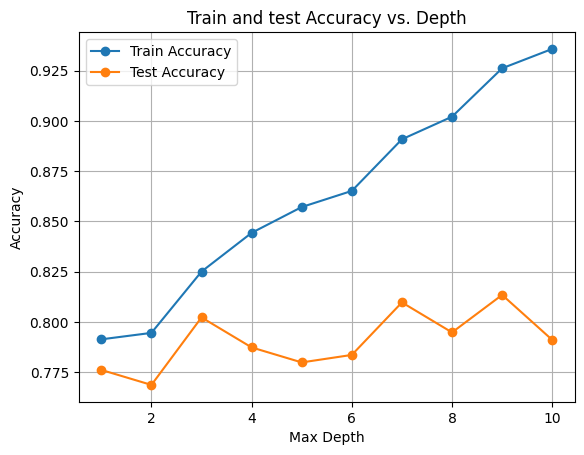

In [129]:
import matplotlib.pyplot as plt
depth = [i for i in range(1, 11)]
plt.plot(depth, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(depth, test_accuracy, label='Test Accuracy', marker='o')
plt.title('Train and test Accuracy vs. Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [131]:
dt_3=DecisionTreeClassifier(random_state=54)
dt_3.fit(X_train,y_train)

DecisionTreeClassifier(random_state=54)

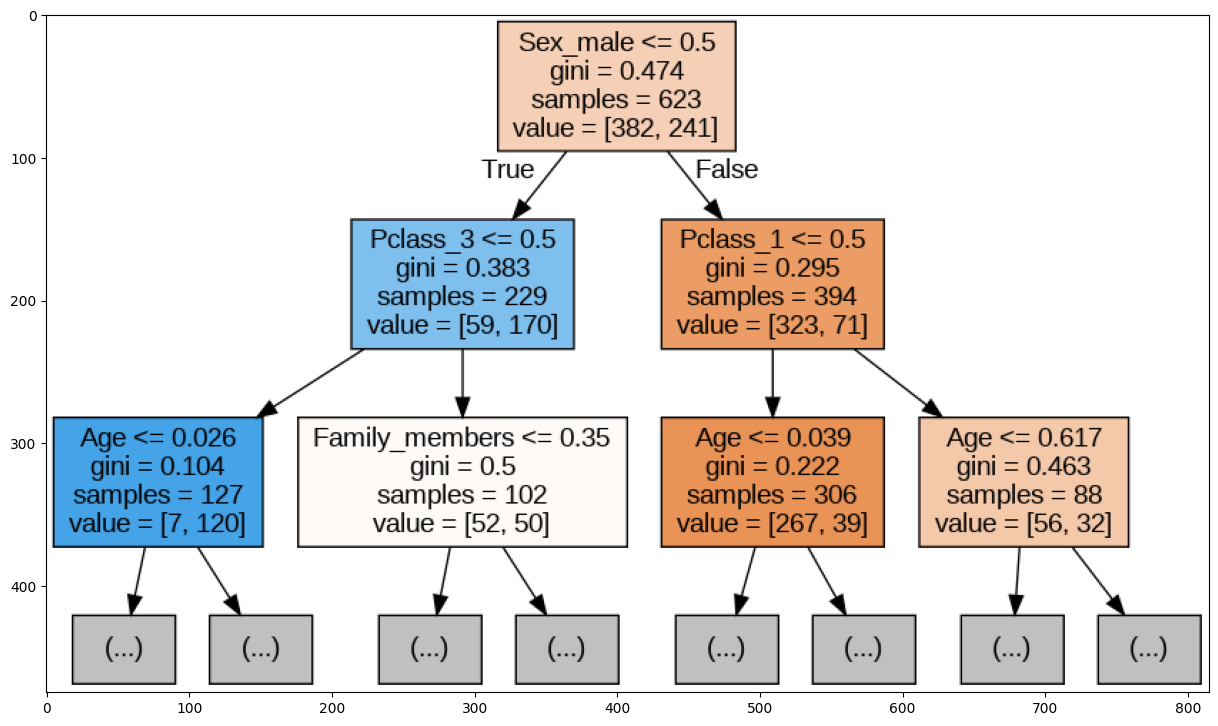

In [132]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_3, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [135]:
#write code here
print(dt_3.score( X_train, y_train))
print(dt_3.score(X_test, y_test))

0.9871589085072231
0.7686567164179104


## Explain: What is your understanding of the charts you made above?

Ans:

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
# Write a code to implement naive bayes algorithm, and give the accuracy for the same


## Explain: What is the difference between Decision Tree Classifier and Naive Bayes algorithm?

Ans:

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#write code here


## Explain: Under what condition will Random Forest and Decision Trees have the same accuracy?

Ans:

## Extra - BaggingClassifier

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


## Explain: What is the difference between Random Forest and Bagging Classifier

Ans:

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score


## Explain: What is the difference between Bagging and Boosting?

Ans:

### 3. Pruning Techniques

https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107

In [ ]:
#write code here
from sklearn.metrics import make_scorer
from sklearn.model_selection import ParameterGrid


In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique


<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

## Explain: After studying these techniques, analyse which method gives you the best accuracy and choose it as your most optimal model.

Ans:


# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **XG Boost Classifier and Regressor**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2023 - 2024